# 1. Analyse des données socio-économiques

In [6]:
# 1)
from gapminder import gapminder as gp
import pandas as pd
from matplotlib import pyplot as plt

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'lifeExp'}>],
       [<AxesSubplot:title={'center':'pop'}>,
        <AxesSubplot:title={'center':'gdpPercap'}>]], dtype=object)

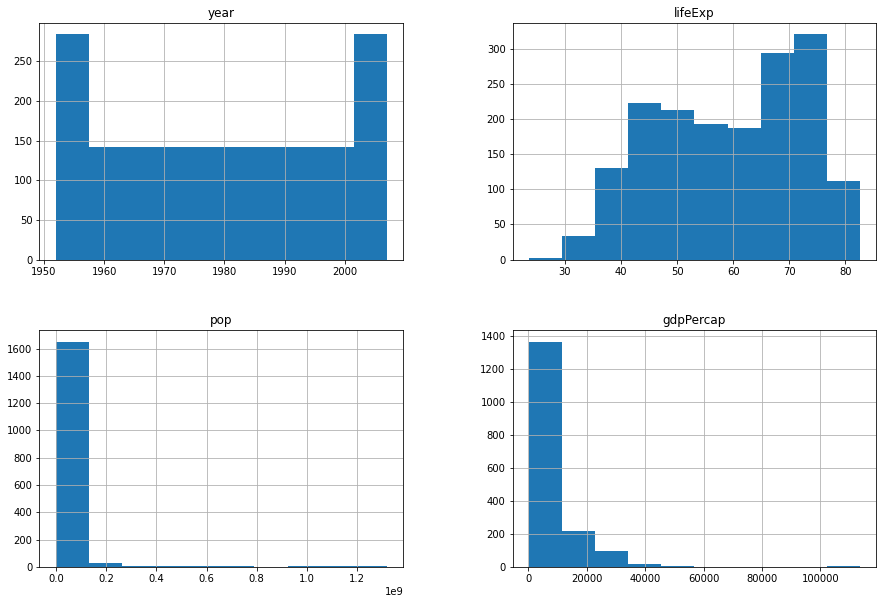

In [4]:
#gp.head() => displays first entries
#gp.describe() => display description of columns 
#gp.info() => display information about the database

# 2)
plt.rcParams['figure.figsize'] = [15, 10]
pd.DataFrame.hist(gp)

## Quesiton 1

Nous pouvons conclure que nous avons pour chaque pays dans la base de données `gapminder` quatre données principales :

* Année
* La population
* L'espérance de vie
* Le produit intérieur brut par habitant ($\frac{\text{PIB}}{\text{population}} = \text{gdpPerCapita}$)


In [92]:
# 3)
gp.groupby("country").head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1692,Zimbabwe,Africa,1952,48.451,3080907,406.884115
1693,Zimbabwe,Africa,1957,50.469,3646340,518.764268
1694,Zimbabwe,Africa,1962,52.358,4277736,527.272182
1695,Zimbabwe,Africa,1967,53.995,4995432,569.795071


In [9]:
# 4)
gp['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [25]:
gp['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [27]:
gp['year'].unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

In [15]:
# 5)
df = pd.DataFrame(gp).groupby(['year'])["lifeExp"].mean().iloc[[0, -1]]
df

year
1952    49.057620
2007    67.007423
Name: lifeExp, dtype: float64

In [88]:
# 6)
df = pd.DataFrame(gp).groupby(['year', 'continent'])["lifeExp"].mean()
print(df.iloc[:5])
print(df.iloc[-5:])

year  continent
1952  Africa       39.135500
      Americas     53.279840
      Asia         46.314394
      Europe       64.408500
      Oceania      69.255000
Name: lifeExp, dtype: float64
year  continent
2007  Africa       54.806038
      Americas     73.608120
      Asia         70.728485
      Europe       77.648600
      Oceania      80.719500
Name: lifeExp, dtype: float64


## Question 2

Le continent qui a eu la plus grande progression est : l'**Océanie**

<AxesSubplot:xlabel='year'>

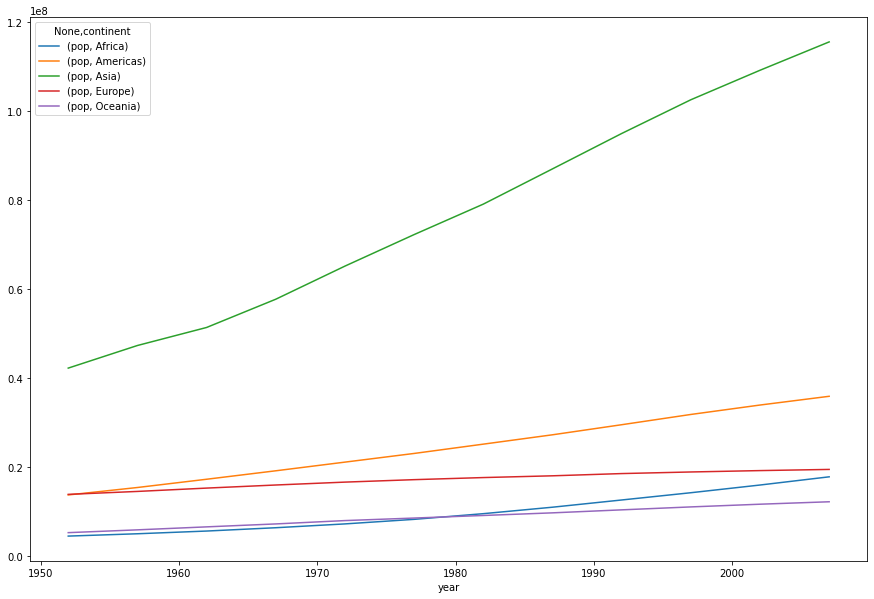

In [5]:
# 7)
df = gp.groupby(['continent','year']).mean('pop').unstack('continent')[['pop']]
df.plot()

## Question 3

On peut en conclure que :

* La population de l'Océanie et l'Europe a peu augmenté
* La population d'Afrique et d'Amérique augmente légèrement comparé à l'Asie
* La population d'Asie a beaucoup augmenté

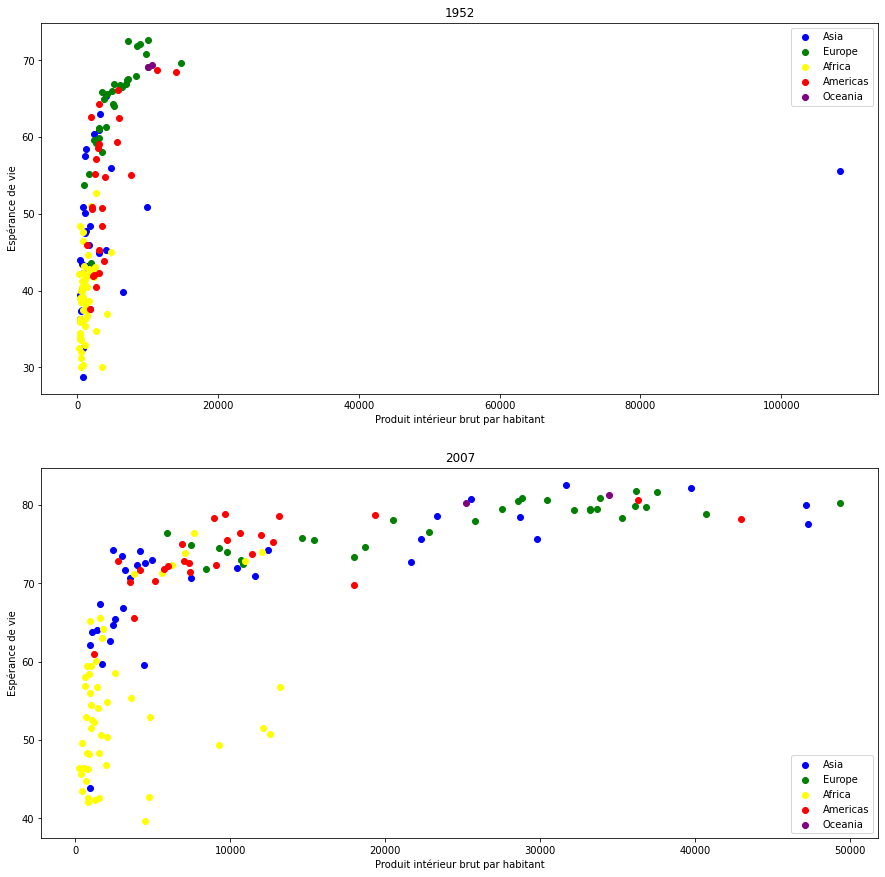

In [9]:
# 8)
colors = {'Americas':'red', 'Europe':'green', 'Asia':'blue', 'Africa':'yellow', 'Oceania':'purple'}
years = {1952, 2007}

fig, axs = plt.subplots(2)
fig.set_figheight(15)
fig.set_figwidth(15)

for continent in gp.continent.unique():
    for index, year in enumerate(years):
        dataYear = gp[gp.year.eq(year)]
        data = dataYear[dataYear.continent.eq(continent)]
        axs[index].scatter(data.gdpPercap, data.lifeExp, c=colors[continent], label=continent)
        axs[index].set_xlabel('Produit intérieur brut par habitant')
        axs[index].set_ylabel('Espérance de vie')
        axs[index].set_title(year) 
        
axs[0].legend()
axs[1].legend()

## Question 4



### 1952

* Les PIB/h des pays étaient assez proches les uns des autres par rapport à leur continent
* Le PIB/h max ne dépasse pas les 20'000\$
* Plus le PIB/h est élevé plus l'espérance de vie l'est aussi. C'est notamment le cas de l'Europe

### 2007

* Les pays qui avaient une bonne espérance de vie en 1952 ont un PIB/h qui a connu une forte croissance
* Le PIB/h max peut monter jusqu'à 50'000$ pour certains pays

### Conclusion

Pour conclure, nous pouvons aussi constater que le PIB/h et l'espérence de vie des pays d'Afrique n'a pas beaucoup augmenté par rapport aux autres continents.

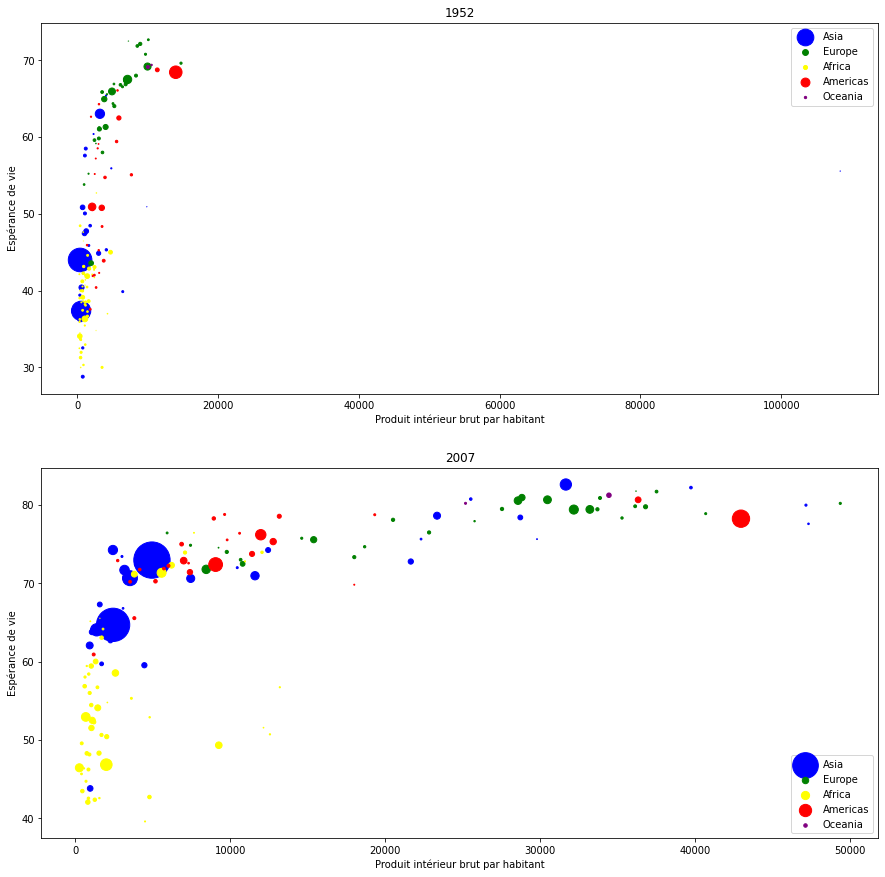

In [10]:
# 9)
colors = {'Americas':'red', 'Europe':'green', 'Asia':'blue', 'Africa':'yellow', 'Oceania':'purple'}
years = {1952, 2007}

fig, axs = plt.subplots(2)
fig.set_figheight(15)
fig.set_figwidth(15)

for continent in gp.continent.unique():
    for index, year in enumerate(years):
        dataYear = gp[gp.year.eq(year)]
        data = dataYear[dataYear.continent.eq(continent)]
        axs[index].scatter(data.gdpPercap, data.lifeExp, s=data[['pop']]/1e6, c=colors[continent], label=continent, facecolors='none')
        axs[index].set_xlabel('Produit intérieur brut par habitant')
        axs[index].set_ylabel('Espérance de vie')
        axs[index].set_title(year) 
        
axs[0].legend()
axs[1].legend()

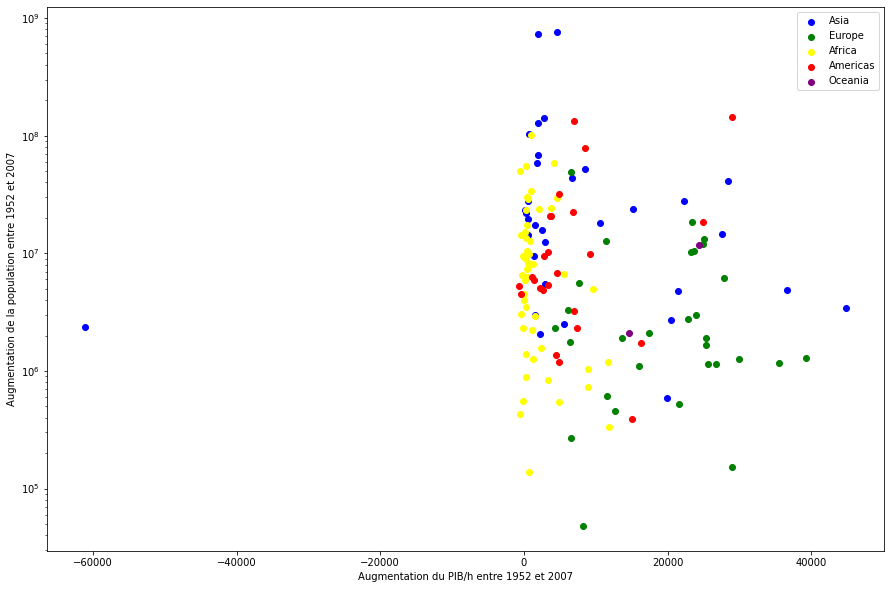

In [142]:
# 10)
colors = {'Americas':'red', 'Europe':'green', 'Asia':'blue', 'Africa':'yellow', 'Oceania':'purple'}

df_delta_pop = pd.DataFrame({
    'Country': [country for country in gp.country.unique()],
    'Continent': [continent for continent in gp.where(gp["year"]==1952)["continent"].dropna()],
    'Population 1952': [pop for pop in gp.where(gp["year"]==1952)["pop"].dropna()],
    'Population 2007': [pop for pop in gp.where(gp["year"]==2007)["pop"].dropna()],
    'PIB 1952': [gdpPercap for gdpPercap in gp.where(gp["year"]==1952)["gdpPercap"].dropna()],
    'PIB 2007': [gdpPercap for gdpPercap in gp.where(gp["year"]==2007)["gdpPercap"].dropna()]})

df_delta_pop['Pop_diff'] = df_delta_pop['Population 2007'] - df_delta_pop['Population 1952']
df_delta_pop['gdpPercap_diff'] = df_delta_pop['PIB 2007'] - df_delta_pop['PIB 1952']

fig, axs = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(15)

for continent in df_delta_pop.Continent.unique():
    data = df_delta_pop[df_delta_pop.Continent.eq(continent)]
    axs.scatter(data[['gdpPercap_diff']], data[['Pop_diff']], c=colors[continent], label=continent)

axs.set_xlabel('Augmentation du PIB/h entre 1952 et 2007')
axs.set_ylabel('Augmentation de la population entre 1952 et 2007') 
axs.set_yscale('log')
axs.legend()

## Question 5

* Premièrement nous obersevons que l'ensemble des données contient quelques valeurs parasites
* De manière générale, le PIB/h des pays de même continent est assez proche. D'ou les groupes de couleurs sur le graphe
* Le PIB/h des pays d'Amérique n'a pas beaucoup augmenté depuis 1952

In [138]:
data = gp.loc[gp.year == 2007]
data

,country,continent,year,lifeExp,pop,gdpPercap
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640
...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906
1691,Zambia,Africa,2007,42.384,11746035,1271.211593
